# DAY 03 GPT — Mini-projeto: “Turno Reprodutível de Medições (RNG + Auditoria + Hist)”

Contexto
Você está simulando um turno curto (amostras) de um processo industrial. O objetivo é gerar dados reprodutíveis com RNG moderno, montar painéis NumPy 2D coerentes, auditar shape/dtype e produzir pelo menos 1 histograma simples para inspecionar distribuição.

Escopo permitido
Somente: Python + NumPy (arrays, `shape/ndim/size/dtype`, slicing, `astype`, promoção de tipo, `np.random.default_rng`, `random`, `integers`, `standard_normal`, `choice`) + Matplotlib mínimo (`plt.hist`, `plt.show`).

Dados (reproduzível)
Use exatamente estas constantes:

* `SEED_A = 7321`
* `SEED_B = 7322`

Tarefas e entregáveis

1. Setup (5 pts)
   Importe `numpy as np` e `matplotlib.pyplot as plt`. Mostre a versão do NumPy.

2. RNG reprodutível (10 pts)
   Crie dois geradores:

* `rng_a1 = np.random.default_rng(SEED_A)`
* `rng_a2 = np.random.default_rng(SEED_A)`
  Gere `u1` e `u2` com `rng_a1.random(size=(2, 6))` e `rng_a2.random(size=(2, 6))`.
  Entregável: uma prova objetiva no notebook de que `u1` e `u2` são iguais (sem usar novas bibliotecas).

3. Uniforme “calibrada” (10 pts)
   Com `rng = np.random.default_rng(SEED_A)`, gere um vetor 1D `temp_c` com 12 medições float no intervalo [18, 26):

* gere base com `rng.random(12)` e transforme por aritmética (escala + deslocamento).
  Entregável: `temp_c` e uma checagem simples mostrando `temp_c.min()` e `temp_c.max()` dentro do intervalo (pode ser print + leitura).

4. Inteiros e regra do high exclusivo (10 pts)
   Gere `defeitos` como array 2D shape (3, 4) com inteiros de 0 a 5 (inclusive).
   Entregável:

* o array `defeitos`
* uma prova objetiva (print de `min`/`max` ou asserts) de que não aparece 6.

5. Painel 2D com promoção de tipo (10 pts)
   Crie um 2D `painel` combinando duas linhas:

* primeira linha: `temp_c[:4]` (4 floats)
* segunda linha: `defeitos[0]` (4 ints)
  Use apenas `np.array([...])` para compor.
  Entregável: `painel` e uma checagem de `painel.dtype` evidenciando a promoção para float.

6. Casting controlado (10 pts)
   Crie `painel_i64 = painel.astype(np.int64)`.
   Entregáveis:

* mostrar lado a lado (print) `painel[0]` e `painel_i64[0]`
* provar que houve truncamento (ex.: algum valor com decimal virou inteiro “para baixo”).

7. Amostragem normal padrão (10 pts)
   Com `rng = np.random.default_rng(SEED_B)`, gere `ruido = rng.standard_normal(800)`.
   Entregável: `ruido` e uma única figura com `plt.hist(ruido, bins=30)` + `plt.show()`.

8. Amostragem categórica por códigos (10 pts)
   Defina `codes = np.array([0, 1, 2])` representando 3 estados (ex.: ok/alerta/falha).
   Gere `estado` com `rng.choice(codes, size=(4, 6), replace=True)`.
   Entregável: `estado` + `estado.shape` e `estado.dtype`.

9. Auditoria compacta (15 pts)
   Crie uma função `audit(arr)` que retorna um `dict` com:

* `shape`, `size`, `ndim`, `dtype` (como string: `str(arr.dtype)`)
  Crie `audits` (dict) contendo auditoria de:
* `u1`, `temp_c`, `defeitos`, `painel`, `painel_i64`, `ruido`, `estado`
  Entregável: `audits` impresso no notebook (pode ser print direto).

10. Auto-validação (10 pts)
    Uma célula final com asserts cobrindo, no mínimo:

* `u1.shape == (2, 6)` e igualdade entre `u1` e `u2`
* `temp_c.shape == (12,)`
* `defeitos.shape == (3, 4)` e `defeitos.max() <= 5`
* `painel.shape == (2, 4)` e `painel.dtype.kind == "f"`
* `painel_i64.dtype == np.int64`

Mapa de pontos

1. 5, 2) 10, 3) 10, 4) 10, 5) 10, 6) 10, 7) 10, 8) 10, 9) 15, 10) 10. Total: 100.

Restrições
Sem Pandas/Seaborn/Sklearn. Sem “tutorial passo a passo” como resposta. Use apenas o escopo permitido acima. Use dados/constantes exatamente como definidos.

In [1]:
# preparação
SEED_A = 7321
SEED_B = 7322

# DAY 03 GPT: Answers

---

1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(f"NumPy version: {np.__version__}")

NumPy version: 2.4.1


---

2.

In [3]:
rng_a1 = np.random.default_rng(SEED_A)
rng_a2 = np.random.default_rng(SEED_A)

u1 = rng_a1.random(size=(2, 6))
u2 = rng_a2.random(size=(2, 6))

In [4]:
u1

array([[0.87418031, 0.75072268, 0.41859802, 0.4226901 , 0.75723967,
        0.43456719],
       [0.21988838, 0.27741549, 0.965401  , 0.62988734, 0.02609961,
        0.68259339]])

In [5]:
u2

array([[0.87418031, 0.75072268, 0.41859802, 0.4226901 , 0.75723967,
        0.43456719],
       [0.21988838, 0.27741549, 0.965401  , 0.62988734, 0.02609961,
        0.68259339]])

In [6]:
np.all(u1 == u2)

np.True_

---

3.

In [7]:
rng = np.random.default_rng(SEED_A)

# outra forma
temp_c_new = rng.uniform(18, 26, size=(12,1))
temp_c_new

array([[24.99344246],
       [24.00578142],
       [21.34878417],
       [21.38152081],
       [24.0579174 ],
       [21.47653755],
       [19.75910706],
       [20.21932396],
       [25.72320799],
       [23.03909871],
       [18.20879689],
       [23.46074709]])

In [8]:
temp_c = 18 + (26 - 18) * rng.random(12)
temp_c

array([21.7955642 , 19.68335958, 25.19806404, 20.37171598, 19.89931526,
       23.42989125, 18.47199233, 24.26795511, 24.26643388, 19.78847105,
       20.682592  , 21.3001265 ])

In [9]:
print(f"Valor mínimo de temp_c: {temp_c.min()}\nValor máximo de temp_c: {temp_c.max()}")

Valor mínimo de temp_c: 18.471992325554936
Valor máximo de temp_c: 25.19806404274905


---

4. 

In [10]:
defeitos = rng.integers(0, 5, size=(3, 4))
defeitos

array([[1, 4, 0, 2],
       [2, 3, 3, 3],
       [2, 4, 0, 4]])

In [11]:
print("Acho que a idéia aqui é provar que não aparece 5")
print(f"Min: {defeitos.min()}\nMax: {defeitos.max()}")

Acho que a idéia aqui é provar que não aparece 5
Min: 0
Max: 4


---

5.

In [12]:
painel = np.array([temp_c[:4], defeitos[0]])
painel

array([[21.7955642 , 19.68335958, 25.19806404, 20.37171598],
       [ 1.        ,  4.        ,  0.        ,  2.        ]])

In [13]:
painel.dtype

dtype('float64')

---

6.

In [14]:
painel_i64 = painel.astype(np.int64)
painel_i64

array([[21, 19, 25, 20],
       [ 1,  4,  0,  2]])

In [15]:
print(f"painel[0]: {painel[0]}\tpainel_i64[0]: {painel_i64[0]}")

painel[0]: [21.7955642  19.68335958 25.19806404 20.37171598]	painel_i64[0]: [21 19 25 20]


painel_i64 sofreu truncamento, ou seja, houve "perda" da parte decimal.

---

7.

In [16]:
rng = np.random.default_rng(SEED_B)
rng

Generator(PCG64) at 0x7D8521A67AE0

In [17]:
ruido = rng.standard_normal(800)

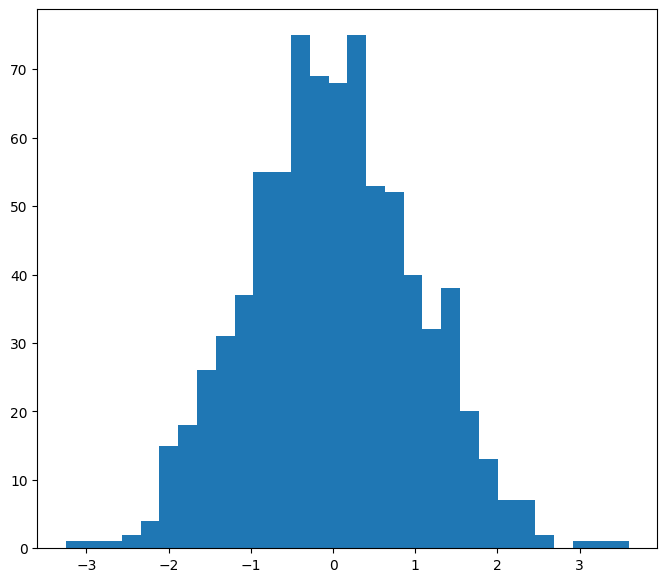

In [18]:
plt.figure(figsize=(8,7))
plt.hist(ruido, bins=30)
plt.show()

---

8.

In [19]:
codes = np.array([0, 1, 2])

In [20]:
estado = rng.choice(codes, size=(4, 6), replace=True)
estado

array([[0, 1, 2, 1, 0, 1],
       [1, 1, 2, 2, 2, 1],
       [1, 1, 1, 2, 1, 2],
       [2, 2, 2, 2, 2, 0]])

In [21]:
estado.shape

(4, 6)

In [22]:
estado.dtype

dtype('int64')

---

9. 

In [23]:
def audit_arr(a):
    return {"shape": a.shape, "size": a.size, "ndim": a.ndim, "dtype": a.dtype}

In [24]:
names = ["u1", "temp_c", "defeitos", "painel" "painel_i64", "ruido", "estado"]
arrs = [u1, temp_c, defeitos, painel, painel_i64, ruido, estado]

audits = {name: audit_arr(arr) for name, arr in zip(names, arrs)}
audits

{'u1': {'shape': (2, 6), 'size': 12, 'ndim': 2, 'dtype': dtype('float64')},
 'temp_c': {'shape': (12,), 'size': 12, 'ndim': 1, 'dtype': dtype('float64')},
 'defeitos': {'shape': (3, 4), 'size': 12, 'ndim': 2, 'dtype': dtype('int64')},
 'painelpainel_i64': {'shape': (2, 4),
  'size': 8,
  'ndim': 2,
  'dtype': dtype('float64')},
 'ruido': {'shape': (2, 4), 'size': 8, 'ndim': 2, 'dtype': dtype('int64')},
 'estado': {'shape': (800,),
  'size': 800,
  'ndim': 1,
  'dtype': dtype('float64')}}

---

10. Não teremos mais este tipo de questão com asserts. Não possuem carater didático. Ou você modifica o uso de assert, oou outra forma. Pois assert condição só tem retorno em casos negativos. Gerar N asserts é cansativo;


# Parecer técnico — Day 03 GPT (RNG + Auditoria + Hist)

### 1) Resumo executivo

O notebook executa sem erros e cobre bem o núcleo do escopo: `default_rng` com seeds, `random`, `standard_normal`, `choice`, composição 2D com promoção de tipo e `astype(np.int64)`, além do histograma. As perdas principais de pontuação foram: range incorreto em `integers` (Q4), auditoria (Q9) fora do formato/itens pedidos e ausência total da auto-validação com asserts (Q10).

### 2) Pontuação e nota

Total: **75/100 → 7,50/10**

Quebra por tarefa:

1. Setup: **5/5**
2. RNG reprodutível: **10/10**
3. Uniforme calibrada: **10/10**
4. Inteiros 0..5 inclusive + prova “não aparece 6”: **6/10**
5. Painel 2D + promoção dtype: **10/10**
6. Casting + evidência de truncamento: **10/10**
7. Normal padrão + hist: **10/10**
8. Choice categórico: **10/10**
9. Auditoria compacta: **4/15**
10. Auto-validação (asserts): **0/10**

### 3) Correções técnicas (por tarefa)

Tarefa 4 (range dos inteiros)
Você gerou `defeitos = rng.integers(0, 5, ...)`, que produz valores em **[0, 4]** (high é exclusivo). O pedido era **0 a 5 inclusive**, e ainda provar que **não aparece 6**.
Patch mínimo:

```python
defeitos = rng.integers(0, 6, size=(3, 4))  # 0..5
print(defeitos.min(), defeitos.max())       # prova objetiva
```

Tarefa 9 (audit + dict audits)
Problemas:

* `dtype` precisava ser string (`str(arr.dtype)`), você retornou `dtype` como objeto.
* O dict `audits` ficou incorreto porque na lista `names` faltou uma vírgula: `"painel" "painel_i64"` virou a string `"painelpainel_i64"`, deslocando o zip (e “ruido/estado” ficaram mapeados errado).
  Patch mínimo:

```python
def audit(arr):
    return {"shape": arr.shape, "size": arr.size, "ndim": arr.ndim, "dtype": str(arr.dtype)}

audits = {
    "u1": audit(u1),
    "temp_c": audit(temp_c),
    "defeitos": audit(defeitos),
    "painel": audit(painel),
    "painel_i64": audit(painel_i64),
    "ruido": audit(ruido),
    "estado": audit(estado),
}
audits
```

Tarefa 10 (asserts) — ausente
Faltou a célula final de auto-validação. Patch mínimo (conforme enunciado):

```python
assert u1.shape == (2, 6)
assert np.array_equal(u1, u2)

assert temp_c.shape == (12,)

assert defeitos.shape == (3, 4)
assert defeitos.max() <= 5

assert painel.shape == (2, 4)
assert painel.dtype.kind == "f"

assert painel_i64.dtype == np.int64
```

### 4) Pontos fortes

Reprodutibilidade bem aplicada (duas instâncias com mesmo seed e igualdade). Transformação correta de [0,1) para [18,26). Painel 2D promove dtype como esperado e o truncamento no `astype(int64)` ficou evidenciado. Histograma ok.

### 5) Pontos a melhorar

Atenção ao `high` exclusivo em `integers`. Auditorias precisam ser “confiáveis” (mapeamento correto + dtype em string). Auto-validação com asserts é parte do entregável e evita perda de pontos por detalhes.

### 6) Reestudo recomendado (apenas do escopo liberado)

`rng.integers` (high exclusivo), `np.array_equal` vs `==` em arrays, e disciplina de “asserts mínimos” para requisitos de shape/range/dtype.

---